In [8]:
# Load libraries
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
filename = 'sonar.all-data.csv'
dataset = read_csv(filename, header=None)

In [3]:
dataset.shape

(208, 61)

In [4]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [6]:
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

In [7]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


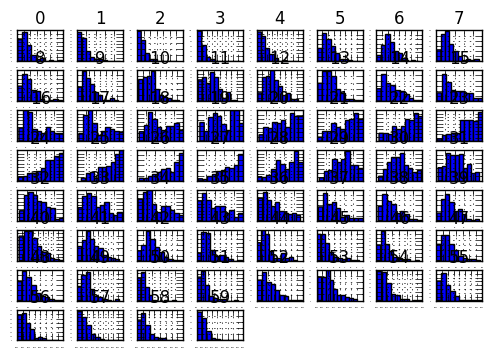

In [9]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

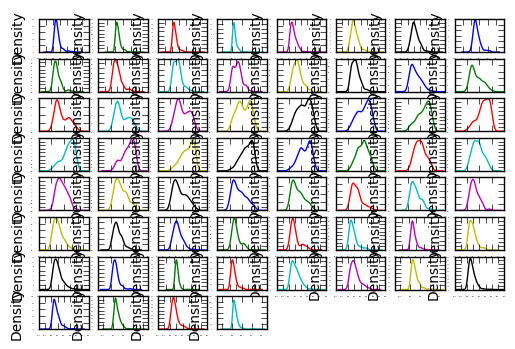

In [10]:
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
plt.show()

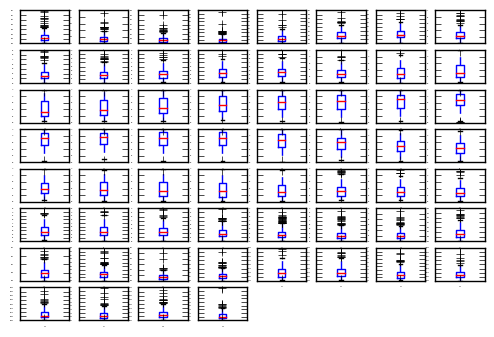

In [11]:
dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
plt.show()

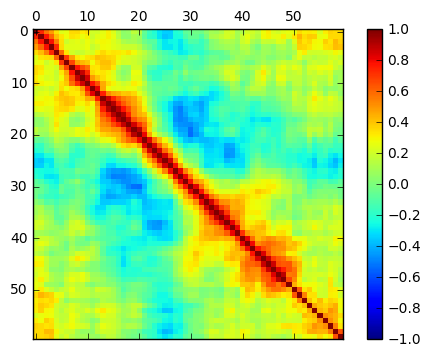

In [14]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax)
plt.show()

In [22]:
array = dataset.values

X = array[:, :-1]
Y = array[:, -1]
validation_size = 0.2
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

X_train.shape

(166, 60)

In [16]:
# Baseline evaluation

n_splits = 10
seed = 7
scoring = 'accuracy'

models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=n_splits, random_state=seed)
    cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    names.append(name)
    
    print name, ':', cv_result.mean(), cv_result.std()

LR : 0.782720588235 0.0937961247549
LDA : 0.746323529412 0.117853678854
KNN : 0.808088235294 0.0675070482031
CART : 0.705514705882 0.0994068970702
NB : 0.648897058824 0.141868421452
SVM : 0.608823529412 0.118656059182


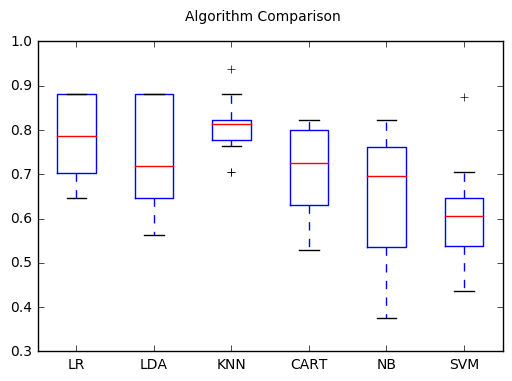

In [17]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [18]:
pipelines = [
    ('ScaledLR', Pipeline([
                ('Scaler', StandardScaler()),
                ('LR', LogisticRegression())
            ])),
    ('ScaledLDA', Pipeline([
                ('Scaler', StandardScaler()),
                ('LDA', LinearDiscriminantAnalysis())
            ])),
    ('ScaledKNN', Pipeline([
                ('Scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier())
            ])),
    ('ScaledCART', Pipeline([
                ('Scaler', StandardScaler()),
                ('CART', DecisionTreeClassifier())
            ])),
    ('ScaledNB', Pipeline([
                ('Scaler', StandardScaler()),
                ('NB', GaussianNB())
            ])),
    ('ScaledSVM', Pipeline([
                ('Scaler', StandardScaler()),
                ('SVM', SVC())
            ]))
]

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=n_splits, random_state=seed)
    cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    names.append(name)
    
    print name, ':', cv_result.mean(), cv_result.std()

/Users/Darkrai/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


ScaledLR : 0.734191176471 0.0958854260154
ScaledLDA : 0.746323529412 0.117853678854
ScaledKNN : 0.825735294118 0.0545110382143
ScaledCART : 0.699264705882 0.132166944472
ScaledNB : 0.648897058824 0.141868421452
ScaledSVM : 0.836397058824 0.0886974721497


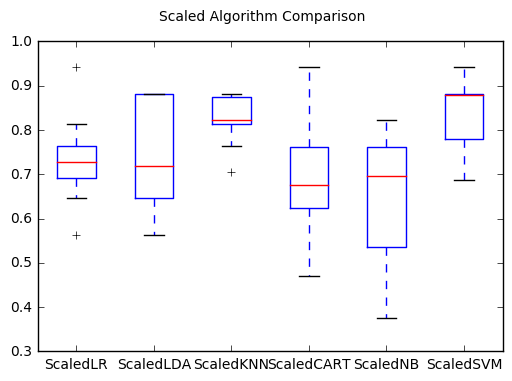

In [23]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
# Tuning KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

param_grid = dict(n_neighbors=[1,3,5,7,9,11,13,15,17,19,21])
kfold = KFold(n_splits=n_splits, random_state=seed)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_result = grid.fit(rescaledX, Y_train)

print 'Best:', grid_result.best_score_, 'Using:', grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print mean, (std), param

Best: 0.849397590361 Using: {'n_neighbors': 1}
0.849397590361 0.0598811009007 {'n_neighbors': 1}
0.83734939759 0.066303303828 {'n_neighbors': 3}
0.83734939759 0.0374996975843 {'n_neighbors': 5}
0.765060240964 0.0895099259628 {'n_neighbors': 7}
0.753012048193 0.0869789794949 {'n_neighbors': 9}
0.734939759036 0.104890074008 {'n_neighbors': 11}
0.734939759036 0.105835978495 {'n_neighbors': 13}
0.728915662651 0.0758730941081 {'n_neighbors': 15}
0.710843373494 0.0787159818667 {'n_neighbors': 17}
0.722891566265 0.0845553777904 {'n_neighbors': 19}
0.710843373494 0.108829206386 {'n_neighbors': 21}


In [26]:
# Tuning SVM
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1., 1.3, 1.5, 1.7, 2.]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()
kfold = KFold(n_splits=n_splits, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print 'Best:', grid_result.best_score_, 'Using:', grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print mean, (std), param

Best: 0.867469879518 Using: {'kernel': 'rbf', 'C': 1.5}
0.759036144578 0.0988632740567 {'kernel': 'linear', 'C': 0.1}
0.530120481928 0.11878006022 {'kernel': 'poly', 'C': 0.1}
0.572289156627 0.130338533274 {'kernel': 'rbf', 'C': 0.1}
0.704819277108 0.0663596226255 {'kernel': 'sigmoid', 'C': 0.1}
0.746987951807 0.108912538449 {'kernel': 'linear', 'C': 0.3}
0.644578313253 0.132290308771 {'kernel': 'poly', 'C': 0.3}
0.765060240964 0.0923115233817 {'kernel': 'rbf', 'C': 0.3}
0.734939759036 0.0546311637577 {'kernel': 'sigmoid', 'C': 0.3}
0.740963855422 0.0830348315078 {'kernel': 'linear', 'C': 0.5}
0.680722891566 0.0986376464366 {'kernel': 'poly', 'C': 0.5}
0.789156626506 0.0643155997818 {'kernel': 'rbf', 'C': 0.5}
0.746987951807 0.0592652196625 {'kernel': 'sigmoid', 'C': 0.5}
0.746987951807 0.0845253927735 {'kernel': 'linear', 'C': 0.7}
0.740963855422 0.127960447348 {'kernel': 'poly', 'C': 0.7}
0.813253012048 0.0848860856501 {'kernel': 'rbf', 'C': 0.7}
0.753012048193 0.0585130464847 {'kern

In [28]:
ensembles = [
    ('AD', AdaBoostClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('RF', RandomForestClassifier()),
    ('ET', ExtraTreesClassifier())
]

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=n_splits, random_state=seed)
    cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    names.append(name)
    
    print name, ':', cv_result.mean(), cv_result.std()

AD : 0.819852941176 0.0582926411043
GBM : 0.841544117647 0.107758224704
RF : 0.765441176471 0.0975034379662
ET : 0.817279411765 0.136059714431


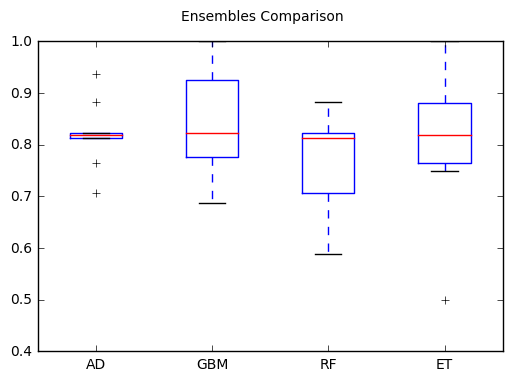

In [29]:
fig = plt.figure()
fig.suptitle('Ensembles Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [30]:
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)

rescaledValidationX = scaler.transform(X_validation)
predict = model.predict(rescaledValidationX)

print accuracy_score(Y_validation, predict)
print confusion_matrix(Y_validation, predict)
print classification_report(Y_validation, predict)

0.857142857143
[[23  4]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42

